In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

# Exploration des données

In [4]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [5]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Elias, Mr. Joseph Jr",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Pclass

In [6]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


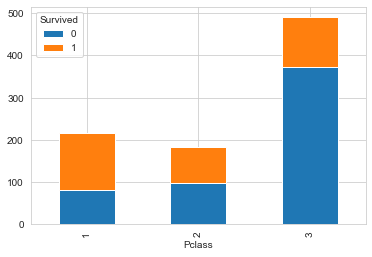

In [7]:
train_df.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

## Name

In [8]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [9]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Jonkheer', 'Don','Sir', 'Col','Countess', 'Dona', 'Lady'], 'Royal title')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
print('   Fréquence : \n \n',train_df['Title'].value_counts())    
print('\n   Taux de survie : \n \n',train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

   Fréquence : 
 
 Mr             517
Miss           185
Mrs            126
Master          40
Rare            18
Royal title      5
Name: Title, dtype: int64

   Taux de survie : 
 
          Title  Survived
0       Master  0.575000
1         Miss  0.702703
2           Mr  0.156673
3          Mrs  0.793651
4         Rare  0.277778
5  Royal title  0.600000


## Age

In [10]:
print(train_df.groupby(['Sex', 'Pclass', 'Title', ])['Age'].median())

Sex     Pclass  Title      
female  1       Miss           30.0
                Mrs            40.0
                Rare           49.0
                Royal title    40.5
        2       Miss           24.0
                Mrs            32.0
        3       Miss           18.0
                Mrs            31.0
male    1       Master          4.0
                Mr             40.0
                Rare           51.0
                Royal title    40.0
        2       Master          1.0
                Mr             31.0
                Rare           46.5
        3       Master          4.0
                Mr             26.0
Name: Age, dtype: float64


In [11]:
train_df['Age'] = train_df.groupby(['Sex','Pclass','Title'])['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex','Pclass','Title'])['Age'].apply(lambda x: x.fillna(x.median()))

## Sex 

In [12]:
train_df.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize=True)

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64

## SibSp

In [13]:
train_df['Family'] = train_df['Parch'] + train_df['SibSp']
test_df['Family'] = test_df['Parch'] + test_df['SibSp']

In [14]:
train_df.groupby(['Family'])['Survived'].value_counts(normalize=True)

Family  Survived
0       0           0.696462
        1           0.303538
1       1           0.552795
        0           0.447205
2       1           0.578431
        0           0.421569
3       1           0.724138
        0           0.275862
4       0           0.800000
        1           0.200000
5       0           0.863636
        1           0.136364
6       0           0.666667
        1           0.333333
7       0           1.000000
10      0           1.000000
Name: Survived, dtype: float64

In [15]:
def FamilySize(x):
    """
    A function for Family size transformation
    """
    if x == 1 or x == 2:
        return 'little'
    elif x == 3:
        return 'medium'
    elif x >= 5:
        return 'big'
    else:
        return 'single'

train_df['Family'] = train_df['Family'].apply(lambda x : FamilySize(x))
test_df['Family'] = test_df['Family'].apply(lambda x : FamilySize(x))

In [16]:
train_df.groupby(['Pclass', 'Family'])['Survived'].mean()

Pclass  Family
1       big       0.500000
        little    0.734043
        medium    0.714286
        single    0.540541
2       big       1.000000
        little    0.600000
        medium    0.769231
        single    0.352381
3       big       0.095238
        little    0.384615
        medium    0.666667
        single    0.205357
Name: Survived, dtype: float64

## Ticket

In [17]:
def Ticket_Prefix(x):
    """
    Function for extracting prefixes. Tickets have length of 1-3.
    """
    l = x.split()
    if len(x.split()) == 3:
        return x.split()[0] + x.split()[1]
    elif len(x.split()) == 2:
        return x.split()[0]
    else:
        return 'None'

train_df['TicketPrefix'] = train_df['Ticket'].apply(lambda x: Ticket_Prefix(x))
test_df['TicketPrefix'] = test_df['Ticket'].apply(lambda x: Ticket_Prefix(x))

In [18]:
train_df.TicketPrefix.unique()

array(['A/5', 'PC', 'STON/O2.', 'None', 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'SC/AHBasle',
       'A/4', 'WE/P', 'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2',
       'S.C./PARIS', 'C.A./SOTON'], dtype=object)

## Fare

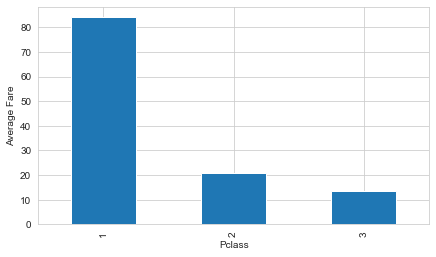

In [19]:
ax = plt.subplot()
ax.set_ylabel('Average Fare')
train_df.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(7, 4), ax=ax)
test_df['Fare'] = test_df.groupby(['Pclass'])['Fare'].apply(lambda x: x.fillna(x.median()))

## Cabin

In [20]:
train_df.Cabin.fillna('Unknown',inplace=True)
test_df.Cabin.fillna('Unknown',inplace=True)

train_df['Cabin'] = train_df['Cabin'].map(lambda x: x[0])
test_df['Cabin'] = test_df['Cabin'].map(lambda x: x[0])

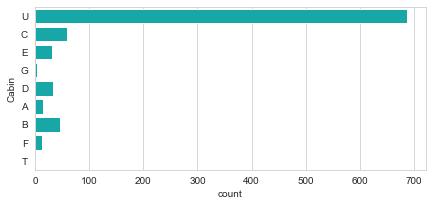

In [21]:
#Now let's see. Most of the cabins aren't filled.
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y='Cabin', data=train_df, color='c')

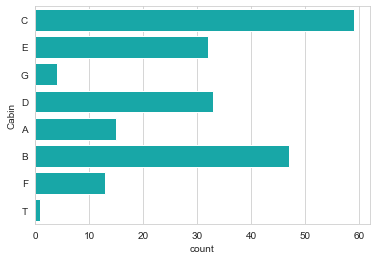

In [22]:
#Other cabins vary in number.
sns.countplot(y='Cabin', data=train_df[train_df.Cabin != 'U'], color='c')

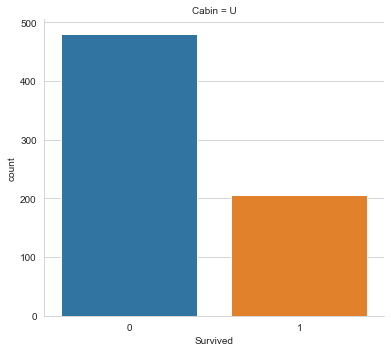

In [23]:
#catplot montre que la plupart des passagers dont l'information sur la cabine est absente ne survive pas 
sns.catplot(x ='Survived', col ='Cabin', col_wrap=4, data=train_df[train_df.Cabin == 'U'], kind='count')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


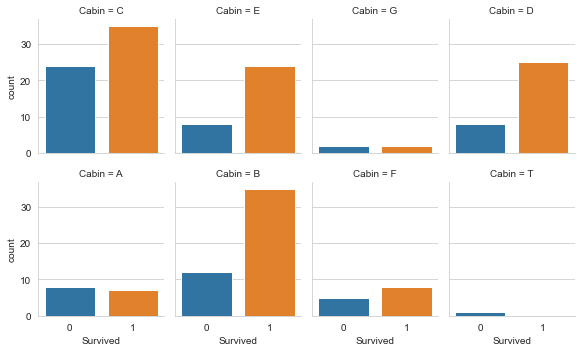

In [24]:
#For passengers with known Cabins survival rate varies.
sns.catplot(x = 'Survived', col='Cabin', col_wrap=4, data=train_df[train_df.Cabin != 'U'], kind='count', size=2.5, aspect=.8)

In [25]:
train_df.groupby(['Cabin']).mean()[train_df.groupby(['Cabin']).mean().columns[1:2]]

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
U,0.299854


## Embarked

In [26]:
MedEmbarked = train_df.groupby('Embarked').count()['PassengerId']
train_df.Embarked.fillna(MedEmbarked, inplace=True)

# Data preparation

In [27]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,TicketPrefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,little,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,little,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,single,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,little,None
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,single,None


In [28]:
#Drop des colonnes non nécéssaires
to_drop = ['Ticket', 'Name', 'SibSp', 'Parch']
for i in to_drop:
    train_df.drop([i], axis=1, inplace=True)
    test_df.drop([i], axis=1, inplace=True)

In [29]:
for col in train_df.columns:
    if train_df[col].dtype == 'object' or col == 'Pclass':
        dummies = pd.get_dummies(train_df[col], drop_first=False)
        dummies = dummies.add_prefix('{}_'.format(col))
        train_df.drop(col, axis=1, inplace=True)
        train_df = train_df.join(dummies)
for col in test_df.columns:
    if test_df[col].dtype == 'object' or col == 'Pclass':
        dummies = pd.get_dummies(test_df[col], drop_first=False)
        dummies = dummies.add_prefix('{}_'.format(col))
        test_df.drop(col, axis=1, inplace=True)
        test_df = test_df.join(dummies)

In [30]:
train_df.head()

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Title_Royal title,Family_big,Family_little,Family_medium,Family_single,TicketPrefix_A./5.,TicketPrefix_A.5.,TicketPrefix_A/4,TicketPrefix_A/4.,TicketPrefix_A/5,TicketPrefix_A/5.,TicketPrefix_A/S,TicketPrefix_A4.,TicketPrefix_C,TicketPrefix_C.A.,TicketPrefix_C.A./SOTON,TicketPrefix_CA,TicketPrefix_CA.,TicketPrefix_F.C.,TicketPrefix_F.C.C.,TicketPrefix_Fa,TicketPrefix_None,TicketPrefix_P/PP,TicketPrefix_PC,TicketPrefix_PP,TicketPrefix_S.C./A.4.,TicketPrefix_S.C./PARIS,TicketPrefix_S.O./P.P.,TicketPrefix_S.O.C.,TicketPrefix_S.O.P.,TicketPrefix_S.P.,TicketPrefix_S.W./PP,TicketPrefix_SC,TicketPrefix_SC/AH,TicketPrefix_SC/AHBasle,TicketPrefix_SC/PARIS,TicketPrefix_SC/Paris,TicketPrefix_SCO/W,TicketPrefix_SO/C,TicketPrefix_SOTON/O.Q.,TicketPrefix_SOTON/O2,TicketPrefix_SOTON/OQ,TicketPrefix_STON/O2.,TicketPrefix_SW/PP,TicketPrefix_W./C.,TicketPrefix_W.E.P.,TicketPrefix_W/C,TicketPrefix_WE/P
0,1,0,22.0,7.2500,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,38.0,71.2833,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,26.0,7.9250,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,4,1,35.0,53.1000,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,35.0,8.0500,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
X_train = train_df.drop('Survived',axis=1)
Y_train = train_df['Survived']
X_test  = test_df

In [32]:
clf = RandomForestClassifier(n_estimators = 15,
                                criterion = 'gini',
                                max_features = 'sqrt',
                                max_depth = None,                                
                                min_samples_split =7,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = 18)
clf = clf.fit(X_train, Y_train)
indices = np.argsort(clf.feature_importances_)[::-1]

print('Feature ranking:')
for f in range(X_train.shape[1]):
    print('%d. feature %d %s (%f)' % (f + 1, indices[f], X_train.columns[indices[f]], clf.feature_importances_[indices[f]]))

Feature ranking:
1. feature 22 Title_Mr (0.206367)
2. feature 6 Sex_female (0.156121)
3. feature 7 Sex_male (0.116374)
4. feature 2 Fare (0.085648)
5. feature 3 Pclass_1 (0.064074)
6. feature 1 Age (0.046314)
7. feature 5 Pclass_3 (0.044004)
8. feature 23 Title_Mrs (0.033617)
9. feature 21 Title_Miss (0.030922)
10. feature 27 Family_little (0.030457)
11. feature 4 Pclass_2 (0.022510)
12. feature 19 Embarked_S (0.020286)
13. feature 20 Title_Master (0.019048)
14. feature 0 PassengerId (0.017906)
15. feature 28 Family_medium (0.010655)
16. feature 16 Cabin_U (0.010294)
17. feature 26 Family_big (0.009780)
18. feature 12 Cabin_E (0.009699)
19. feature 17 Embarked_C (0.006642)
20. feature 11 Cabin_D (0.006361)
21. feature 48 TicketPrefix_PC (0.006145)
22. feature 68 TicketPrefix_SW/PP (0.004740)
23. feature 42 TicketPrefix_CA. (0.004619)
24. feature 69 TicketPrefix_W./C. (0.004541)
25. feature 24 Title_Rare (0.004147)
26. feature 29 Family_single (0.003971)
27. feature 39 TicketPrefix_C.A.

In [33]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(X_train)
train_new.shape

(891, 14)

In [34]:
best_features = X_train.columns[indices[0:train_new.shape[1]]]
X = X_train[best_features]
Xt = X_test[best_features]
best_features

Index(['Title_Mr', 'Sex_female', 'Sex_male', 'Fare', 'Pclass_1', 'Age',
       'Pclass_3', 'Title_Mrs', 'Title_Miss', 'Family_little', 'Pclass_2',
       'Embarked_S', 'Title_Master', 'PassengerId'],
      dtype='object')

# Model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_train, test_size=0.33, random_state=44)

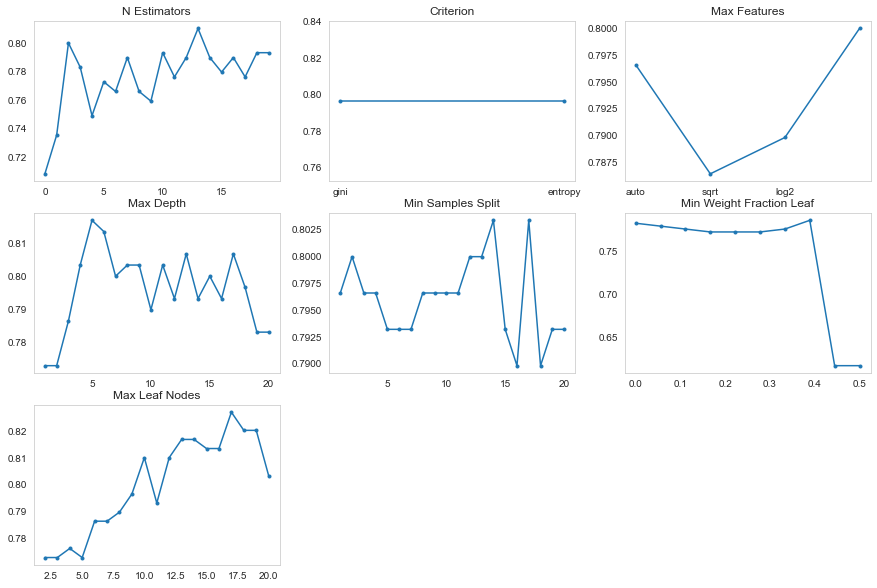

In [38]:
plt.figure(figsize=(15,10))

#N Estimators
plt.subplot(3,3,1)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(n_estimators=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('N Estimators')
plt.grid();

#Criterion
plt.subplot(3,3,2)
feature_param = ['gini','entropy']
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(criterion=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(scores, '.-')
plt.title('Criterion')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

#Max Features
plt.subplot(3,3,3)
feature_param = ['auto','sqrt','log2',None]
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_features=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(scores, '.-')
plt.axis('tight')
plt.title('Max Features')
plt.xticks(range(len(feature_param)), feature_param)
plt.grid();

#Max Depth
plt.subplot(3,3,4)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_depth=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Depth')
plt.grid();

#Min Samples Split
plt.subplot(3,3,5)
feature_param = range(1,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Samples Split')
plt.grid();

#Min Weight Fraction Leaf
plt.subplot(3,3,6)
feature_param = np.linspace(0,0.5,10)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(min_weight_fraction_leaf =feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Min Weight Fraction Leaf')
plt.grid();

#Max Leaf Nodes
plt.subplot(3,3,7)
feature_param = range(2,21)
scores=[]
for feature in feature_param:
    clf = RandomForestClassifier(max_leaf_nodes=feature)
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test,y_test))
plt.plot(feature_param, scores, '.-')
plt.axis('tight')
plt.title('Max Leaf Nodes')
plt.grid();

In [41]:
#Mes paramètres optimales
clf = RandomForestClassifier(n_estimators = 200,
                                criterion = 'entropy',
                                max_features = None,
                                max_depth = 50,                                
                                min_samples_split =7,
                                min_weight_fraction_leaf = 0.0,
                                max_leaf_nodes = 18)

clf.fit(X, Y_train)
Y_pred_RF = clf.predict(Xt)

clf.score(X_test,y_test)

0.864406779661017